In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Подгрузили все либы, после чего загружаем датасет и смотрим типы данных

In [2]:
df = pd.read_excel('ID_data_mass_18122012.xlsx', engine='openpyxl', sheet_name='VU')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Номер                           185 non-null    int64         
 1   Дата                            185 non-null    datetime64[ns]
 2   Глубина манометра               185 non-null    object        
 3   Dшт                             185 non-null    float64       
 4   Руст                            185 non-null    float64       
 5   Рзаб                            185 non-null    object        
 6   Pлин                            185 non-null    object        
 7   Руст.1                          185 non-null    float64       
 8   Рзаб.1                          185 non-null    object        
 9   Рлин                            185 non-null    object        
 10  Туст                            185 non-null    float64       
 11  Тна шл

преобразуем таблицу, удалим ненужный столбец КГФ.1 и изменим пропуски на NaN

In [3]:
df = df.drop('КГФ.1', axis=1)
df.replace(['не спускался', '-'], np.nan, inplace=True)

смотрим количество пропусков в строках

In [4]:
C=len(df.columns)
L=len(df.index)
CN=df.count() #количество
NP=((L-CN)/L)*100 #процент пропущенных значений
MN=df.min() #минимум
Q1=df.quantile(q=0.25) #первый квартиль
MA=df.mean() #среднее значение
ME=df.median() #медиана
Q3=df.quantile(q=0.75) #третий квартиль
MX=df.max() #максимум
ST=df.std() #стандартное отклонение
P=df.nunique() #мощность
IQ=Q3-Q1 #интерквартильный размах

frame = pd.concat([CN, NP, MN, Q1, MA, ME, Q3, MX, ST, P, IQ], axis=1, join="inner")
frame=frame.T
f=pd.DataFrame(frame)
f.index=['Количество', 'Процент пропусков', 'Минимум', 'Первый квартиль','Среднее', 'Медиана', 'Третий квартиль', 'Максимум','Стандартное отклонение', 'Мощность', 'Интерквартильный размах']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
f1=f.style.apply(lambda x: ["background-color:tomato" if i==1 else "" for i in x], axis=1, subset=(["Мощность"], slice(None))).apply(lambda x: ["background-color:tomato" if i>=60 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:steelblue" if (i<30 and i>0) else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:limegreen" if i==0 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None)))

f1

C:\Users\4tik2\AppData\Local\Temp\ipykernel_19800\2672579721.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=df.quantile(q=0.25) #первый квартиль
C:\Users\4tik2\AppData\Local\Temp\ipykernel_19800\2672579721.py:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  MA=df.mean() #среднее значение
C:\Users\4tik2\AppData\Local\Temp\ipykernel_19800\2672579721.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ME=df.median() #медиана
C:\Users\4tik2\AppData\Local\Temp\ipykernel_19800\2672579721.py:9: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default

,Номер,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа,Дебит ст. конд.,Дебит воды,Дебит смеси,Дебит гааз,Дебит кон нестабильный,Дебит воды.1,Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
Количество,185,181,185,185,181,178,185,181,174,185,124,181,178,185,185,185,176,178,178,178,185,177,158,135,178,178,23,93,23,93,23,93
Процент пропусков,0.000000,2.162162,0.000000,0.000000,2.162162,3.783784,0.000000,2.162162,5.945946,0.000000,32.972973,2.162162,3.783784,0.000000,0.000000,0.000000,4.864865,3.783784,3.783784,3.783784,0.000000,4.324324,14.594595,27.027027,3.783784,3.783784,87.567568,49.729730,87.567568,49.729730,87.567568,49.729730
Минимум,804,3276.000000,6.350000,111.100000,169.250000,19.600000,109.000000,160.000000,40.739839,24.200000,14.000000,100.210000,16.204686,100.300000,26.200000,0.000000,117.868700,755.630000,48.600000,0.000000,22.100000,23.780000,34.000000,41.600000,83.700000,82.605477,0.787416,186.000000,1000.000000,0.570000,2.782623,131.000000
Первый квартиль,21002.000000,3548.500000,9.530000,200.000000,296.800000,94.925000,200.000000,293.900000,94.431548,48.200000,32.075000,104.600000,32.471191,251.500000,72.700000,0.728749,267.758570,2013.207500,114.900000,0.825000,43.000000,36.990000,48.150000,48.600000,90.311538,89.130559,0.787416,782.000000,1000.000000,0.660000,4.381813,164.000000
Среднее,19456.291892,3565.568508,10.997405,229.597848,330.836999,97.588175,228.768131,328.707200,98.147579,55.284865,40.333871,105.304630,38.839565,382.870055,114.397308,2.407085,405.780555,3441.014650,177.871348,2.516854,48.478223,39.895667,51.279357,52.077037,94.987597,93.745470,0.807631,780.847527,1000.000000,0.665260,5.742359,201.705968
Медиана,21303.000000,3577.500000,11.110000,232.000000,338.830800,99.645512,231.000000,337.000000,99.400000,56.500000,38.500000,105.370000,39.396874,366.218938,98.200438,1.554165,388.149710,3041.244840,155.300000,1.700000,45.200000,39.440000,49.800000,50.700000,94.800000,93.560326,0.806017,787.000000,1000.000000,0.667000,5.250915,192.000000
Третий квартиль,22501.000000,3653.000000,12.700000,260.305556,372.620000,103.167190,259.392000,372.100000,103.487823,64.000000,46.050000,106.470000,46.474599,489.673000,142.148359,3.496397,509.218789,4194.625000,221.825000,3.500000,62.572400,42.980000,55.900000,56.000000,98.825000,97.532692,0.821344,793.700000,1000.000000,0.679000,6.125723,224.000000
Максимум,22505,3952.000000,17.460000,348.000000,458.600000,121.682930,348.000000,458.500000,123.616800,75.000000,110.200000,107.620000,55.513904,846.816143,302.621077,11.222107,896.908271,18965.000000,492.800000,11.400000,72.539800,53.270000,64.100000,65.900000,106.600000,105.206020,0.824330,801.000000,1000.000000,0.684660,10.931155,385.415949
Стандартное отклонение,6543.332900,126.201874,2.493816,48.864049,63.501186,12.464947,48.902445,64.582742,9.800728,10.959738,15.260336,1.394948,9.087249,153.070183,58.848155,2.273610,161.208785,2352.277677,91.250025,2.319031,12.325657,5.320672,5.724079,5.952397,5.347800,5.277868,0.015076,62.795111,0.000000,0.020485,2.112717,49.253925
Мощность,14,37,14,173,178,176,139,172,168,94,103,121,174,185,183,144,176,175,170,63,25,39,34,24,113,113,6,25,1,21,23,72


C:\Users\4tik2\AppData\Local\Temp\ipykernel_19800\2915989588.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=3, cbar=False)


<Axes: >

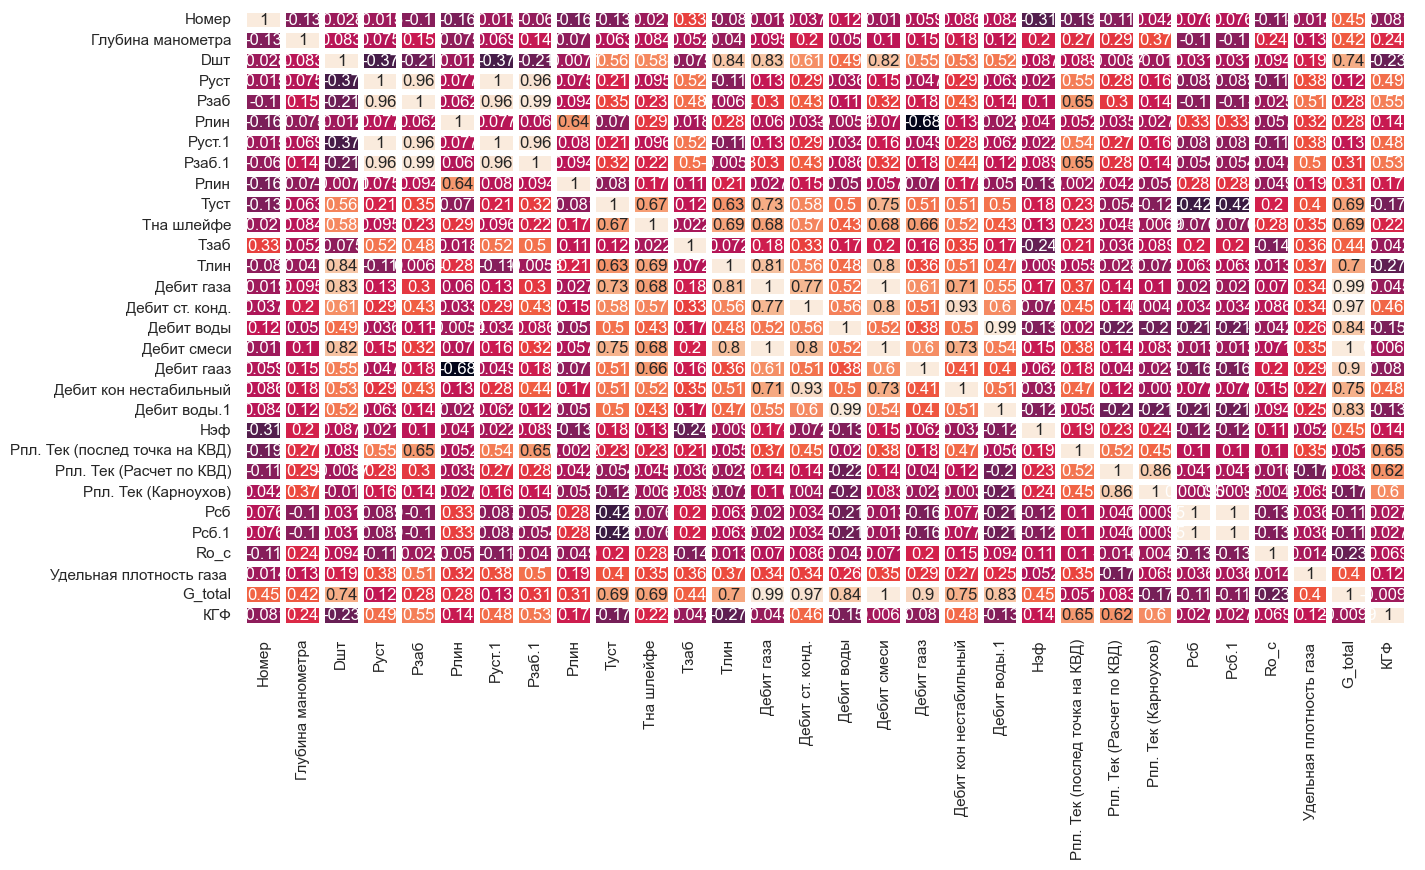

In [5]:

df=df.drop(['Ro_g', 'Ro_w'], axis=1)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(), annot=True, linewidths=3, cbar=False)

Смотрим на сколько зависит пропуски в кгф и G_total от других признаков

In [6]:
df_nan = df.iloc[:, [i for i, n in enumerate(np.var(df.isnull(), axis = 'rows')) if n > 0]]
df_nan.isnull().corr()

,Глубина манометра,Рзаб,Pлин,Рзаб.1,Рлин,Тна шлейфе,Тзаб,Tлин,Дебит смеси,Дебит гааз,Дебит кон нестабильный,Дебит воды.1,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_c,Удельная плотность газа,G_total,КГФ
Глубина манометра,1.000000,1.000000,-0.029480,1.000000,-0.037378,0.211952,1.000000,-0.029480,-0.033617,-0.029480,-0.029480,-0.029480,0.699250,0.359615,0.244271,-0.029480,-0.029480,-0.073527,-0.073527,-0.056623,-0.073527
Рзаб,1.000000,1.000000,-0.029480,1.000000,-0.037378,0.211952,1.000000,-0.029480,-0.033617,-0.029480,-0.029480,-0.029480,0.699250,0.359615,0.244271,-0.029480,-0.029480,-0.073527,-0.073527,-0.056623,-0.073527
Pлин,-0.029480,-0.029480,1.000000,-0.029480,0.788710,0.282738,-0.029480,1.000000,-0.044844,1.000000,1.000000,1.000000,-0.042160,-0.081977,-0.120686,1.000000,1.000000,0.199382,0.199382,0.074721,0.199382
Рзаб.1,1.000000,1.000000,-0.029480,1.000000,-0.037378,0.211952,1.000000,-0.029480,-0.033617,-0.029480,-0.029480,-0.029480,0.699250,0.359615,0.244271,-0.029480,-0.029480,-0.073527,-0.073527,-0.056623,-0.073527
Рлин,-0.037378,-0.037378,0.788710,-0.037378,1.000000,0.358482,-0.037378,0.788710,-0.056857,0.788710,0.788710,0.788710,-0.053454,-0.103938,-0.153017,0.788710,0.788710,0.252795,0.252795,0.094739,0.252795
Тна шлейфе,0.211952,0.211952,0.282738,0.211952,0.358482,1.000000,0.211952,0.282738,0.322412,0.282738,0.282738,0.282738,0.133529,-0.061966,-0.193831,0.282738,0.282738,-0.053700,-0.053700,0.090039,-0.053700
Тзаб,1.000000,1.000000,-0.029480,1.000000,-0.037378,0.211952,1.000000,-0.029480,-0.033617,-0.029480,-0.029480,-0.029480,0.699250,0.359615,0.244271,-0.029480,-0.029480,-0.073527,-0.073527,-0.056623,-0.073527
Tлин,-0.029480,-0.029480,1.000000,-0.029480,0.788710,0.282738,-0.029480,1.000000,-0.044844,1.000000,1.000000,1.000000,-0.042160,-0.081977,-0.120686,1.000000,1.000000,0.199382,0.199382,0.074721,0.199382
Дебит смеси,-0.033617,-0.033617,-0.044844,-0.033617,-0.056857,0.322412,-0.033617,-0.044844,1.000000,-0.044844,-0.044844,-0.044844,-0.048075,-0.093480,-0.137620,-0.044844,-0.044844,0.026349,0.026349,0.085206,0.026349
Дебит гааз,-0.029480,-0.029480,1.000000,-0.029480,0.788710,0.282738,-0.029480,1.000000,-0.044844,1.000000,1.000000,1.000000,-0.042160,-0.081977,-0.120686,1.000000,1.000000,0.199382,0.199382,0.074721,0.199382


как можно понять, сильная зависимость только в Ro_c и удельной плотности газа, но там полностью отсутствуют значения, поэтому удалим строчки, где в G_total и КГФ оба значения отсутствуют. Также дополнительно проверим, зависят ли пропуски от дня недели

In [7]:
null_counts = df.groupby(df['Дата'].dt.weekday)['КГФ'].apply(lambda x: x.isnull().sum())

print(null_counts)

null_counts = df.groupby(df['Дата'].dt.weekday)['G_total'].apply(lambda x: x.isnull().sum())

print(null_counts)



Дата
0     9
1    12
2    13
3    13
4    15
5    14
6    16
Name: КГФ, dtype: int64
Дата
0    17
1    22
2    20
3    23
4    31
5    23
6    26
Name: G_total, dtype: int64


Нету преимущественно дня, в который отсутствовали значения, так что удалим и дату с номерами

In [8]:
df=df.drop(['Дата', 'Номер'], axis=1)
'''
for i in df.columns:
    if(i != 'КГФ' and i != 'G_total'):
      df[i].fillna(df[i].median(), inplace=True)
 '''     
df.dropna(subset=['КГФ', 'G_total'], how='all', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 167
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Глубина манометра               90 non-null     float64
 1   Dшт                             93 non-null     float64
 2   Руст                            93 non-null     float64
 3   Рзаб                            90 non-null     float64
 4   Pлин                            93 non-null     float64
 5   Руст.1                          93 non-null     float64
 6   Рзаб.1                          90 non-null     float64
 7   Рлин                            93 non-null     float64
 8   Туст                            93 non-null     float64
 9   Тна шлейфе                      60 non-null     float64
 10  Тзаб                            90 non-null     float64
 11  Tлин                            93 non-null     float64
 12  Дебит газа                      93 no

Заново произведем перерасчет датафрейма f, чтобы посмотреть на распределение и понять, есть ли выбросы

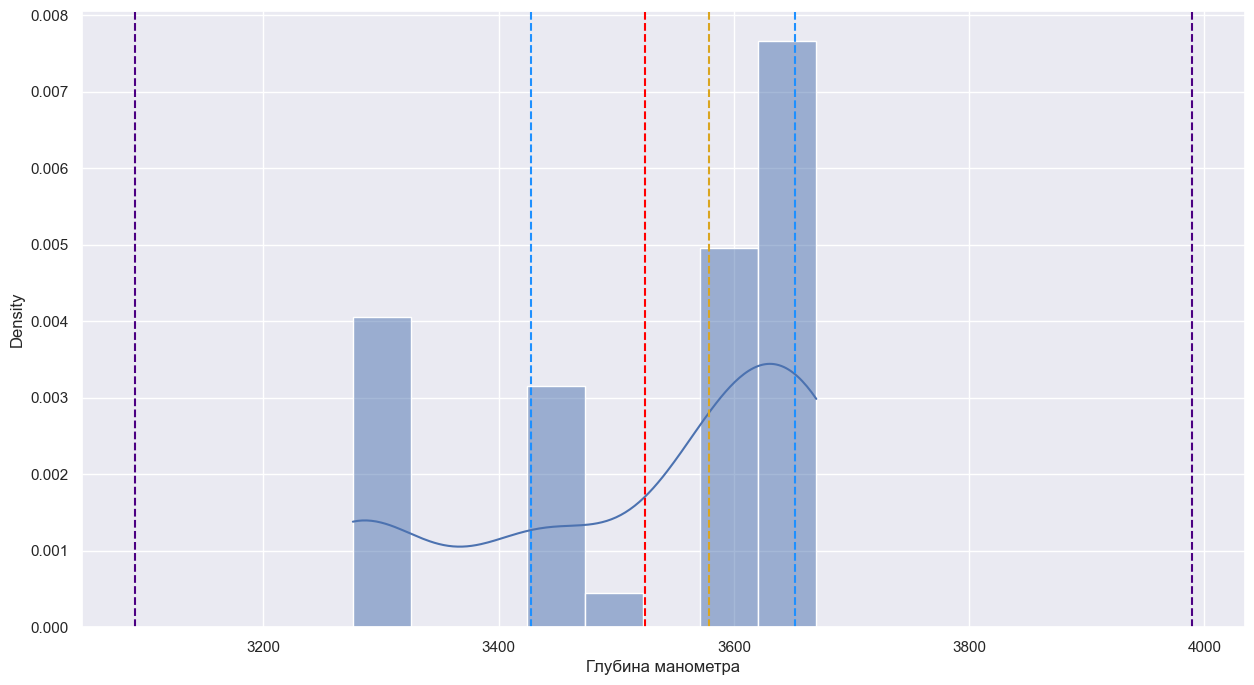

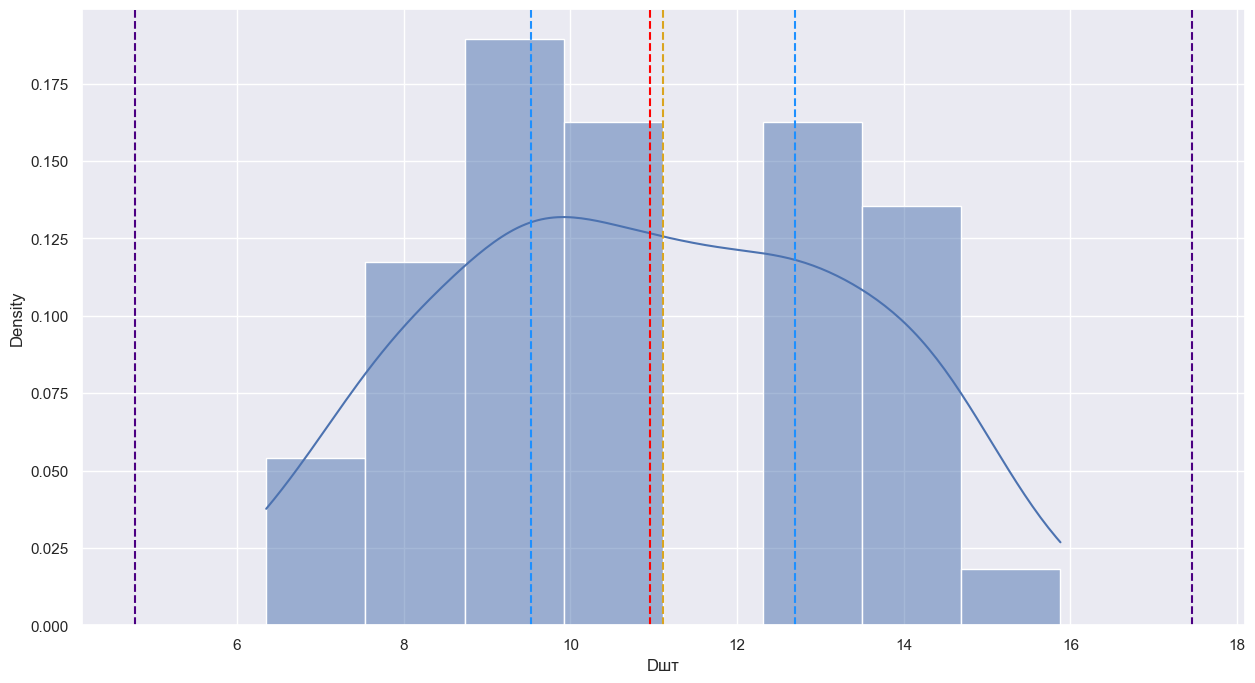

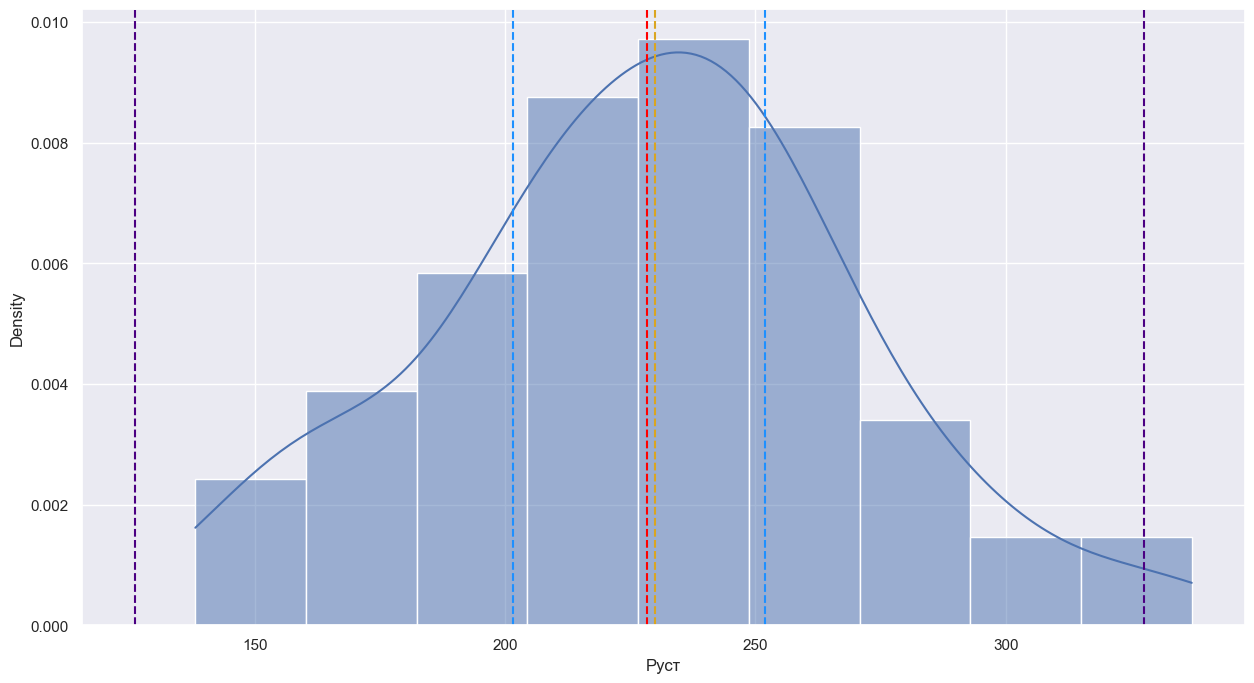

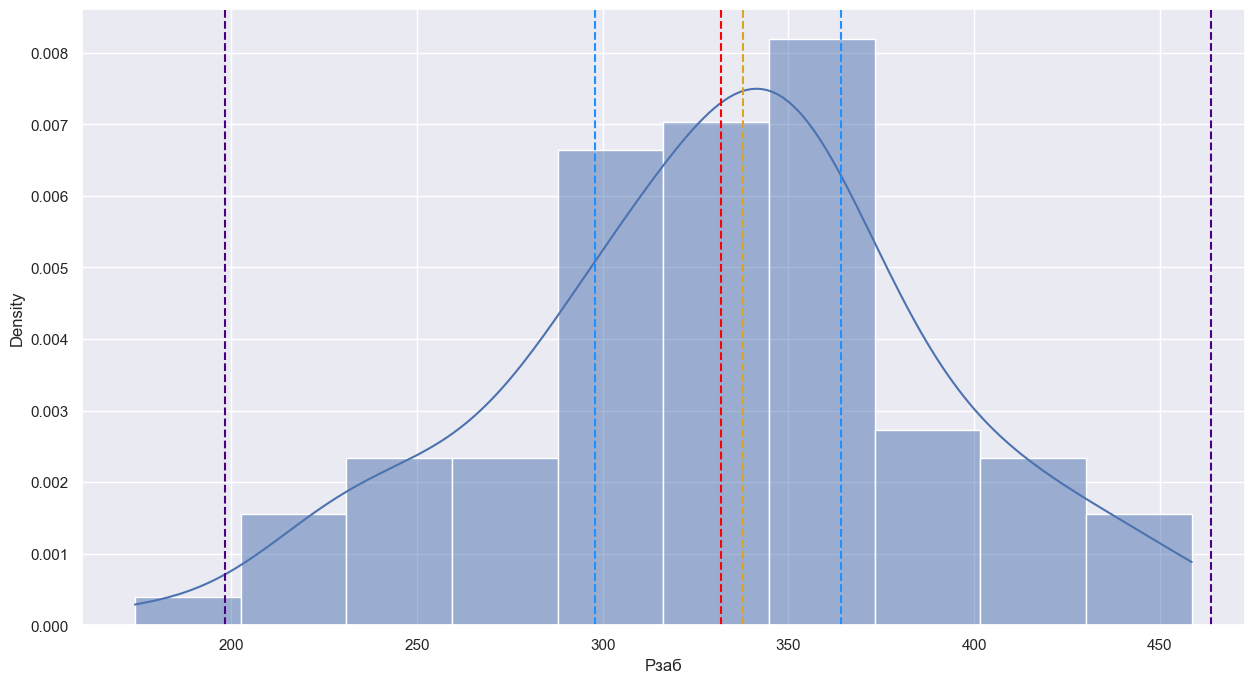

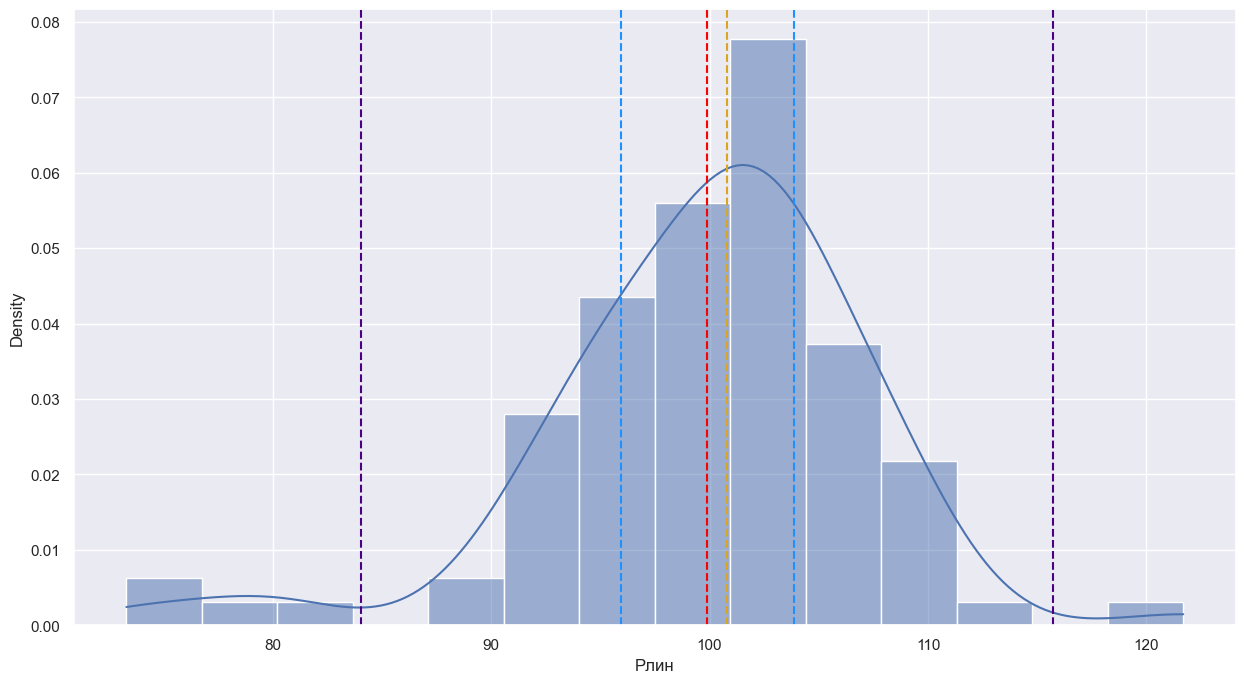

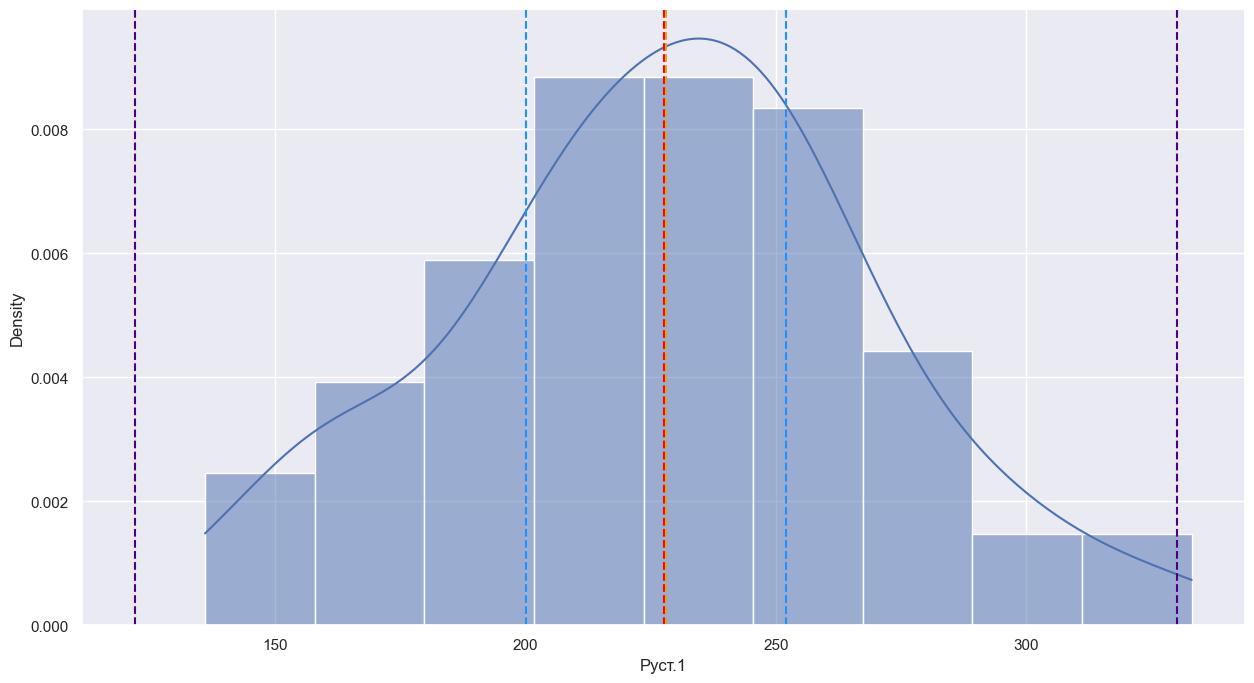

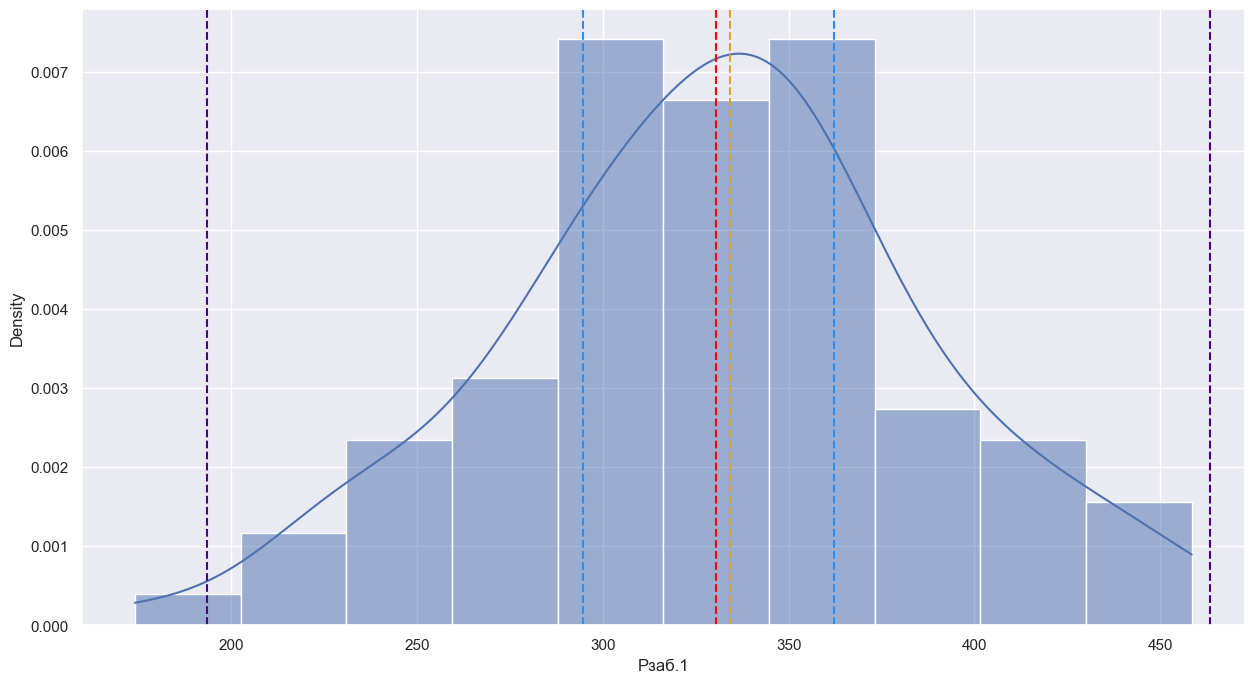

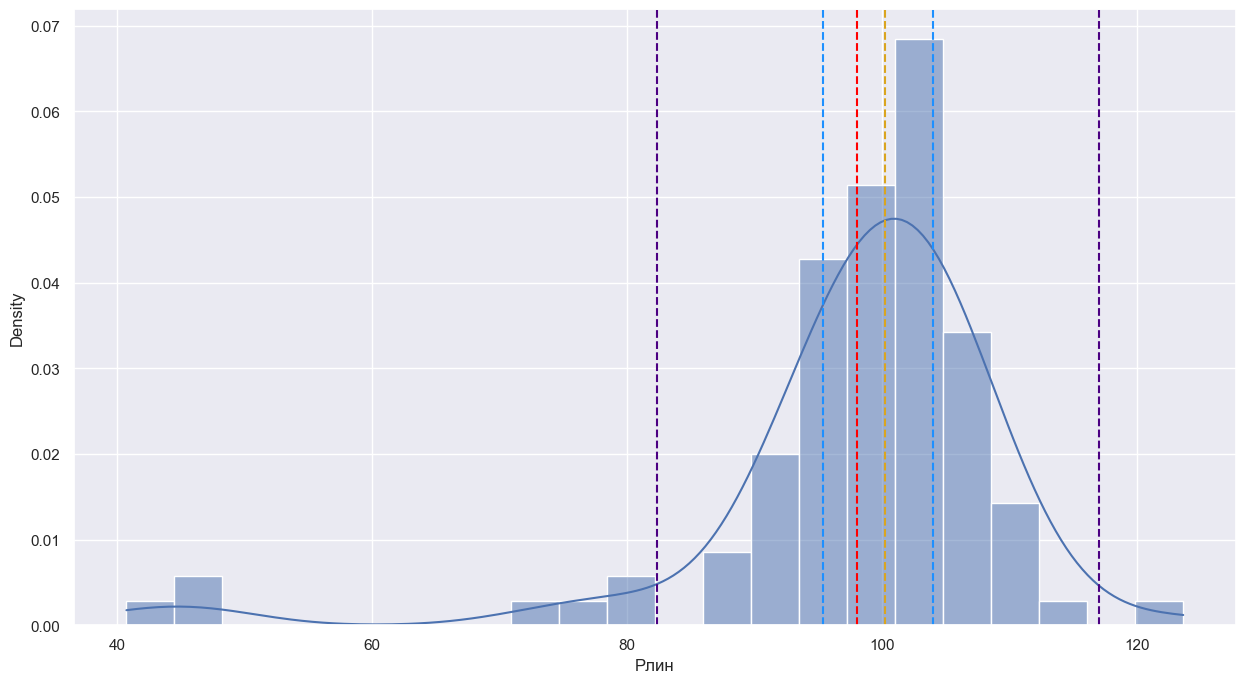

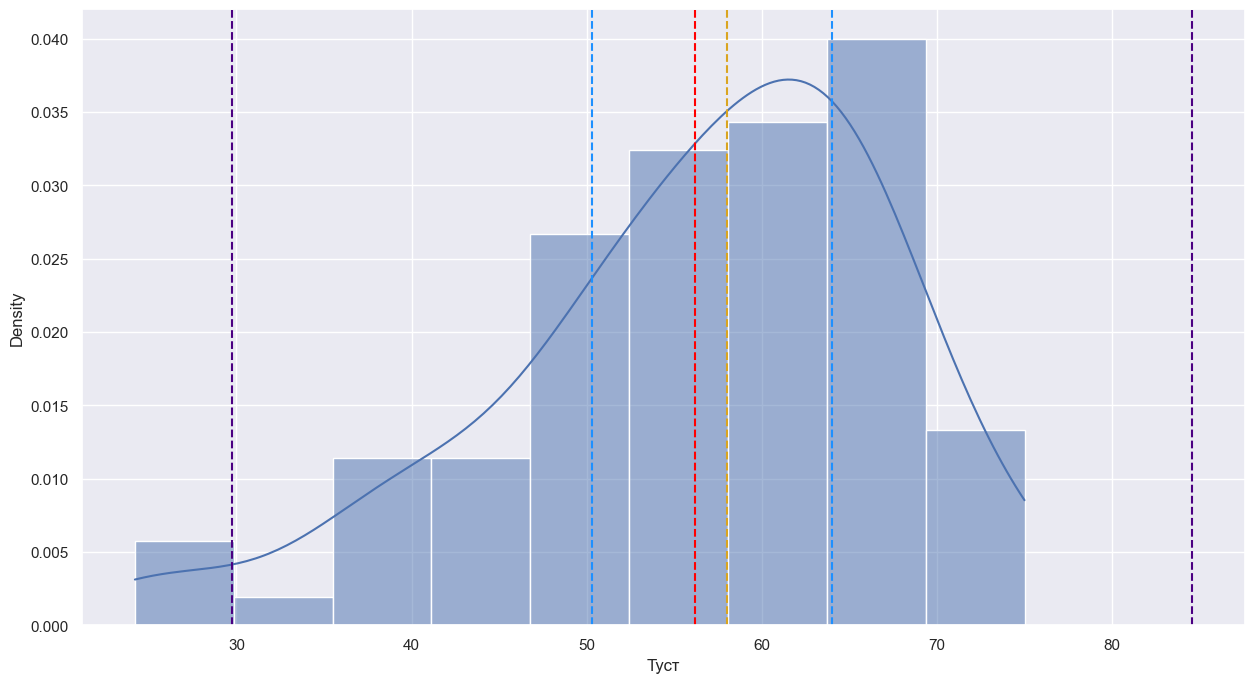

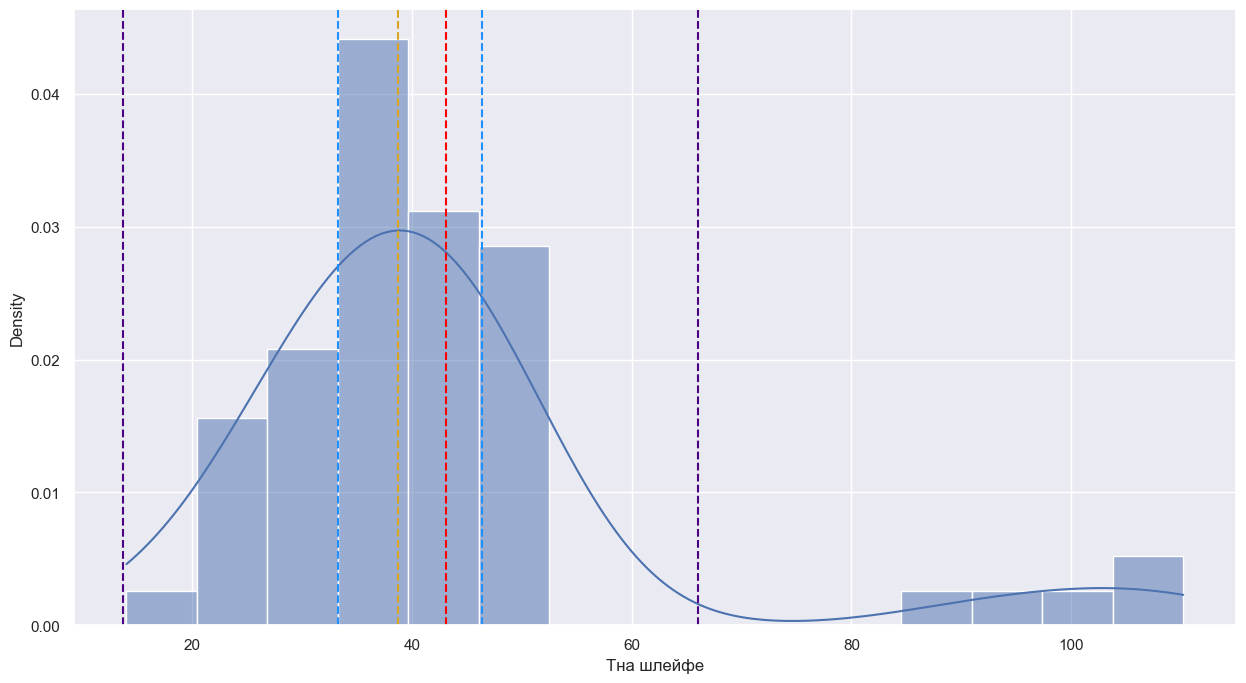

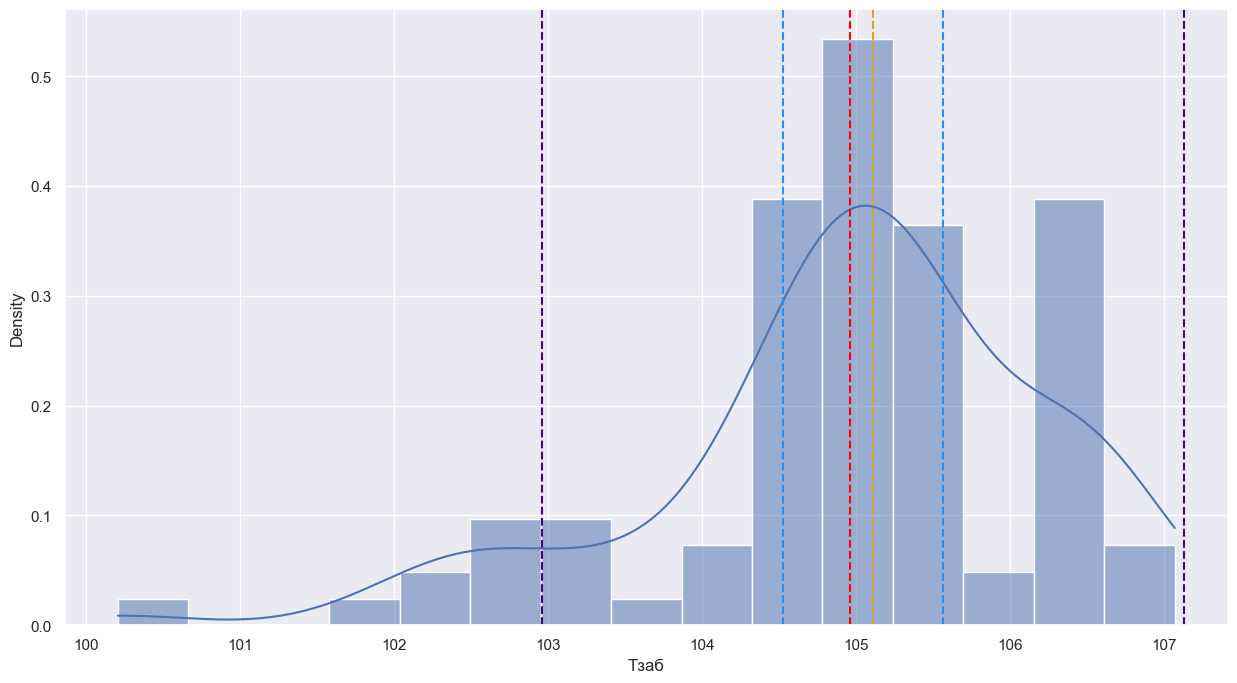

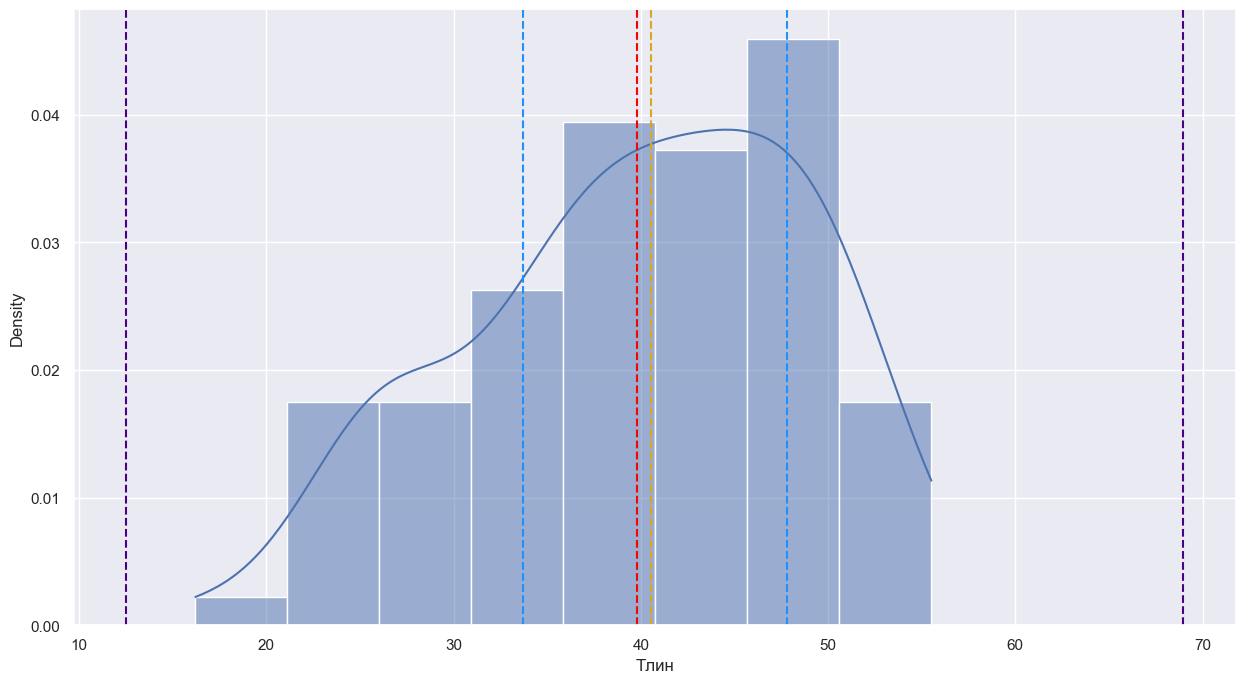

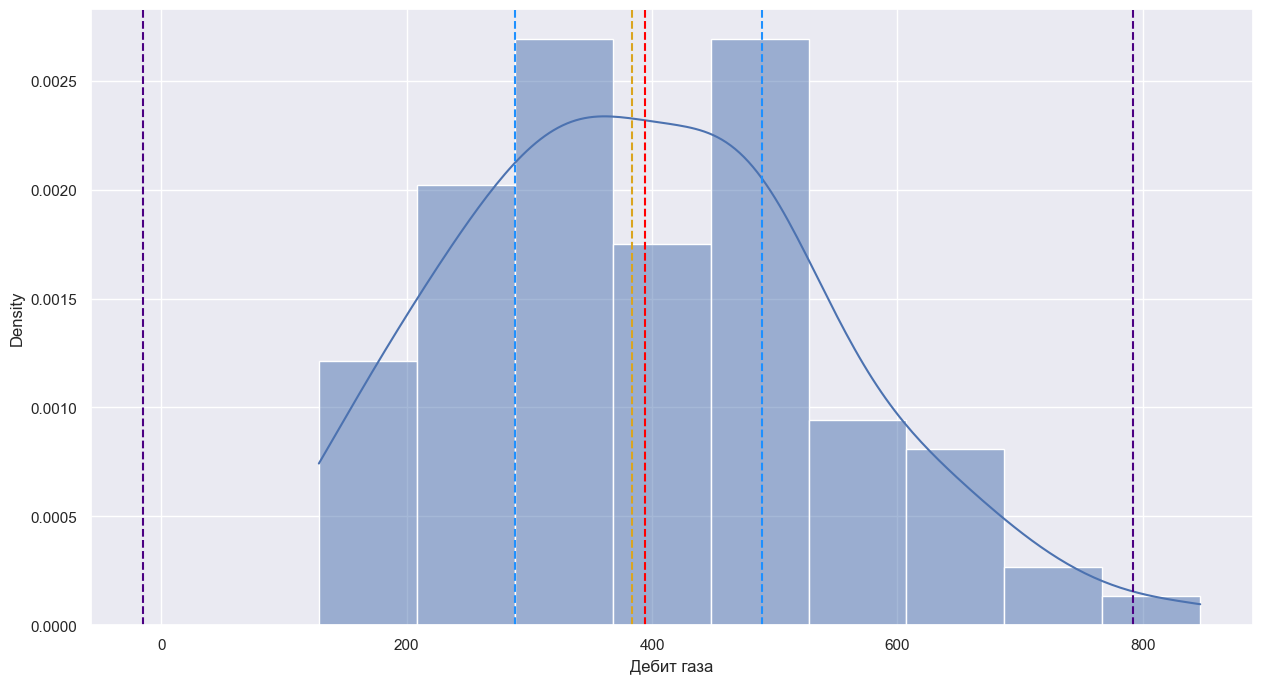

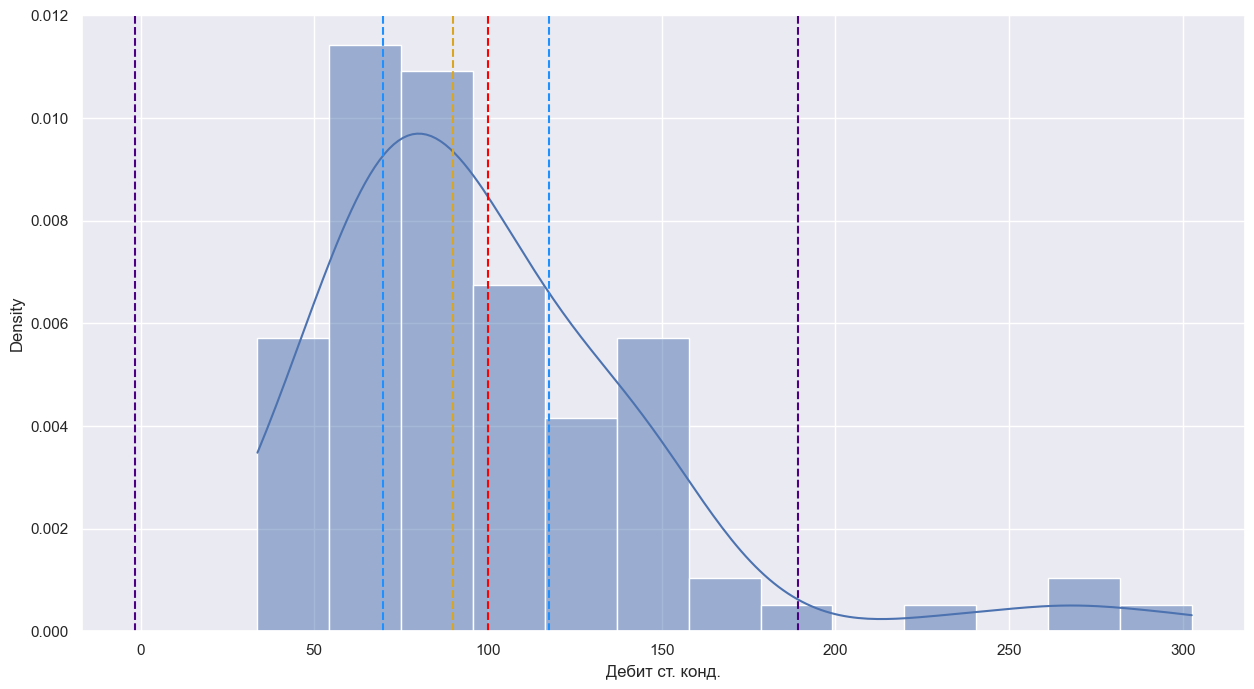

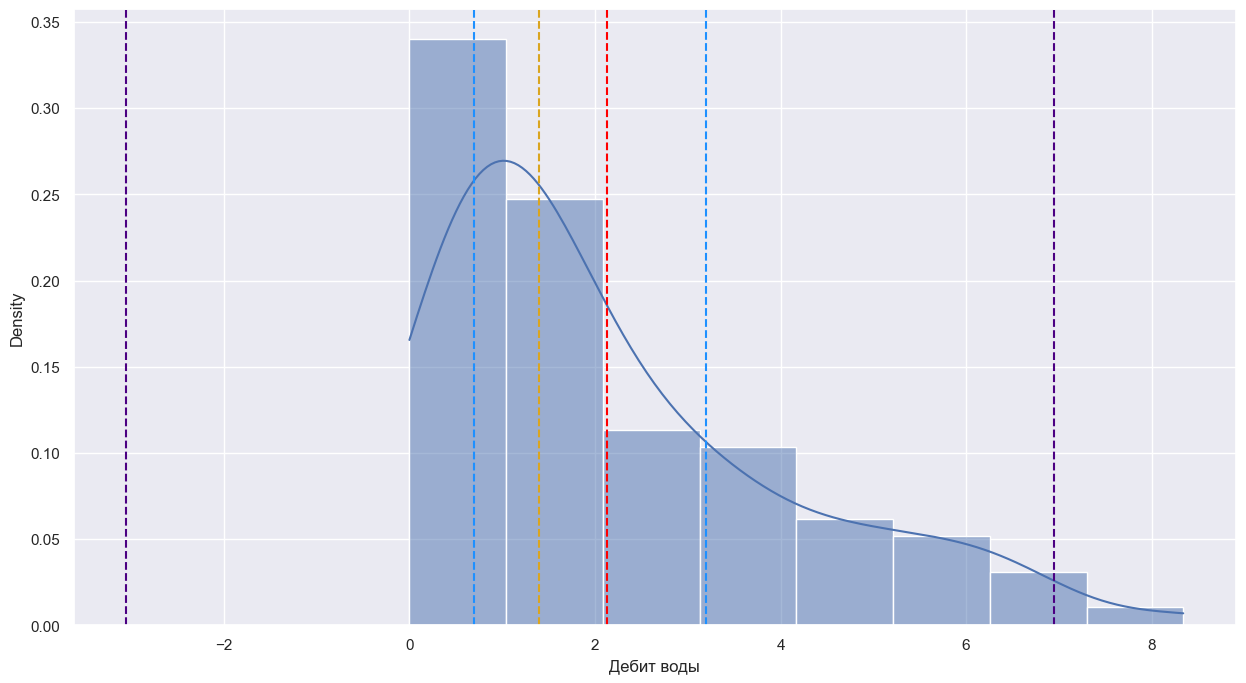

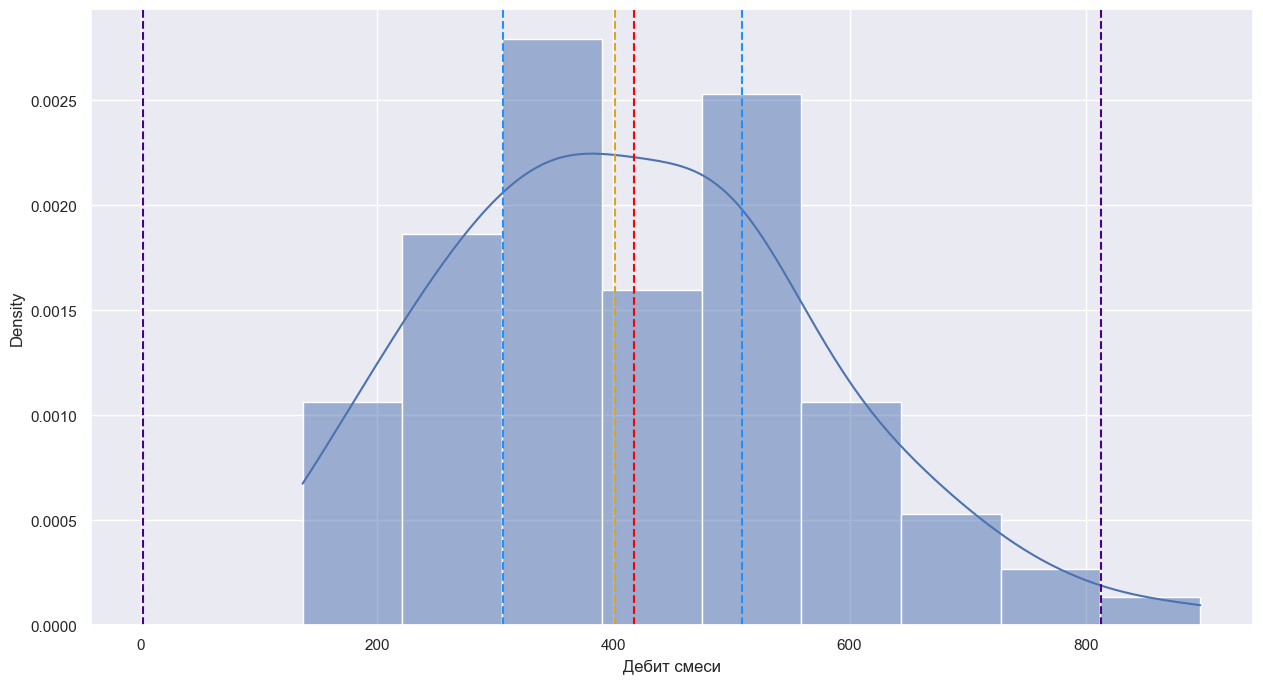

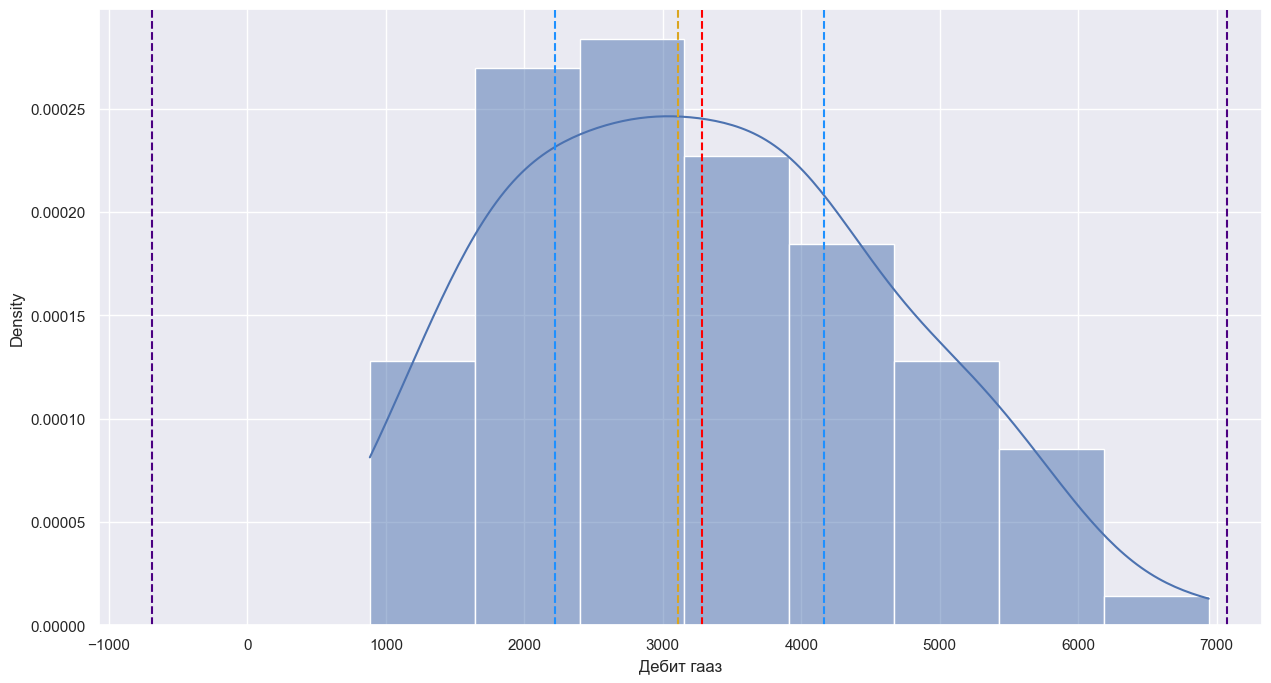

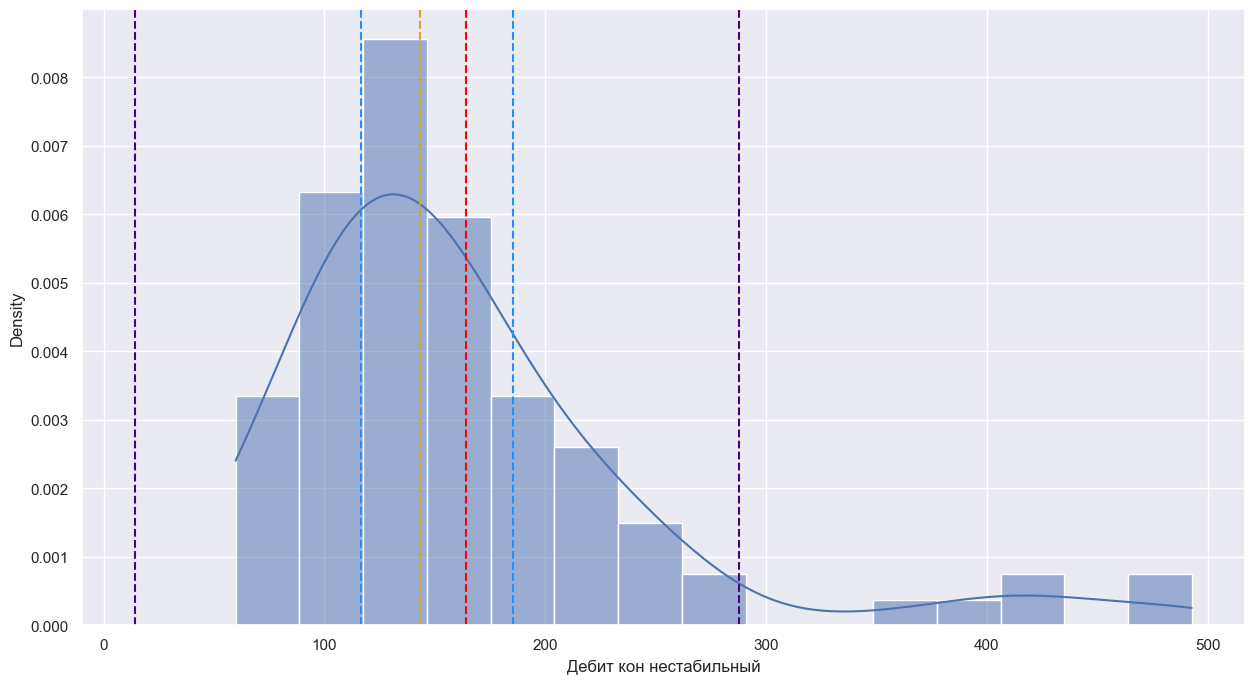

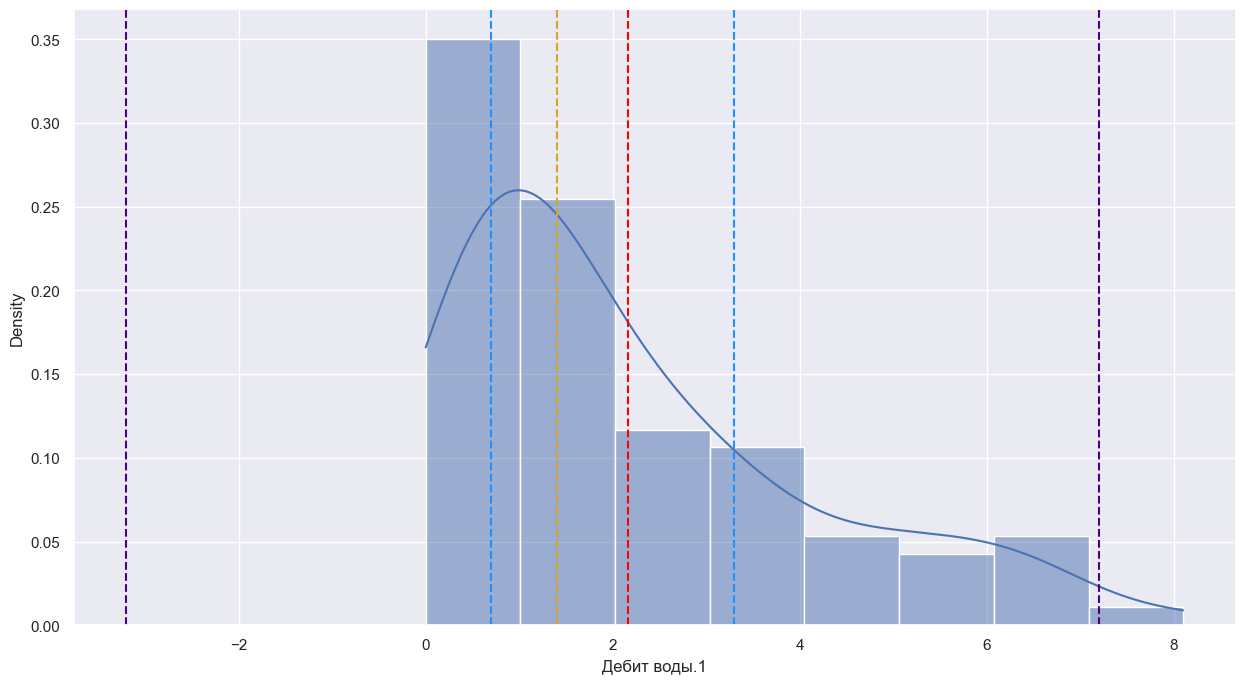

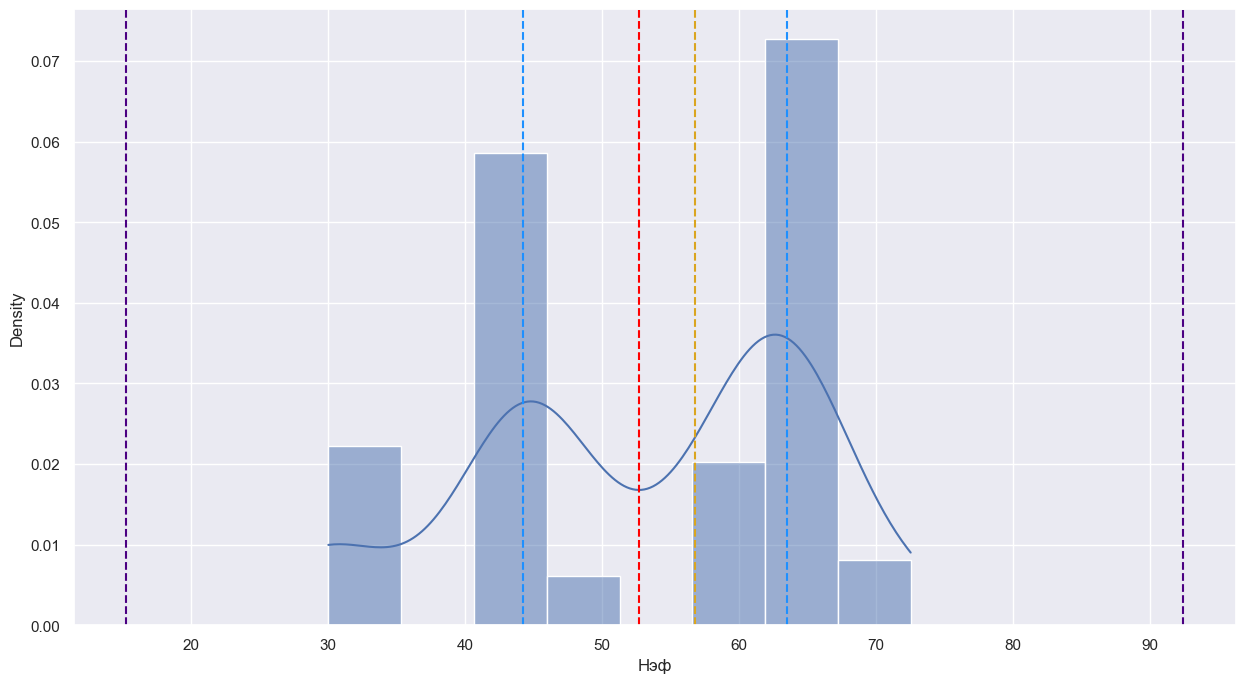

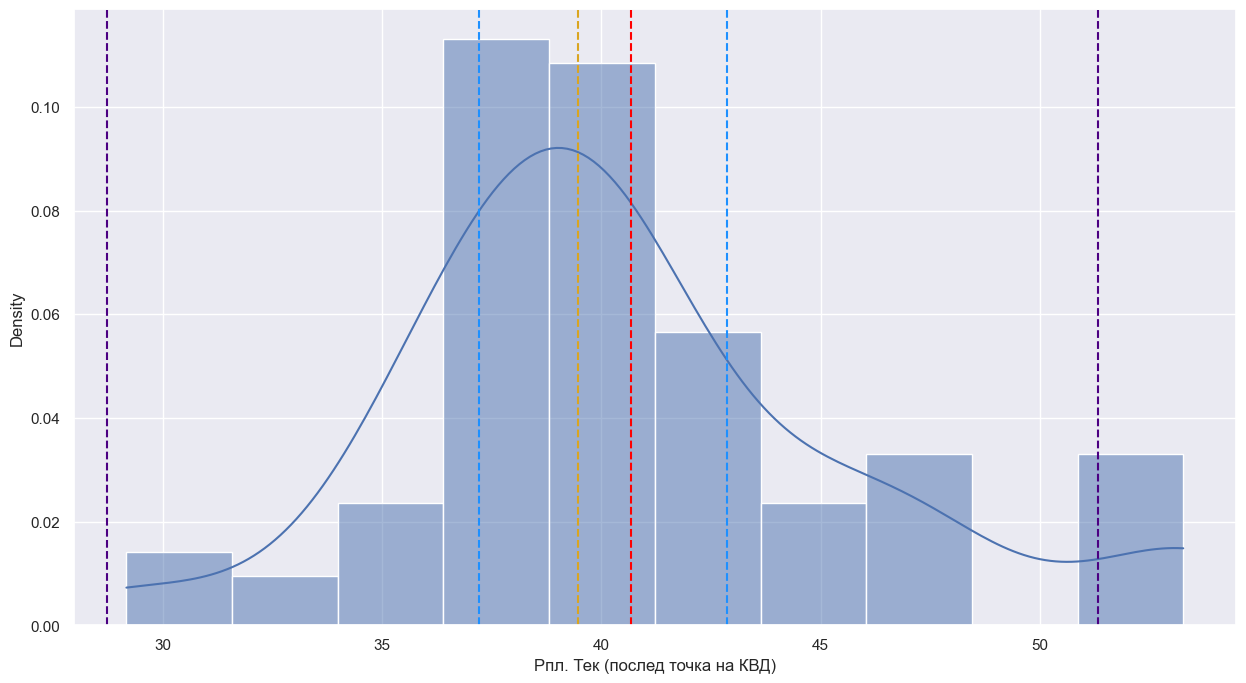

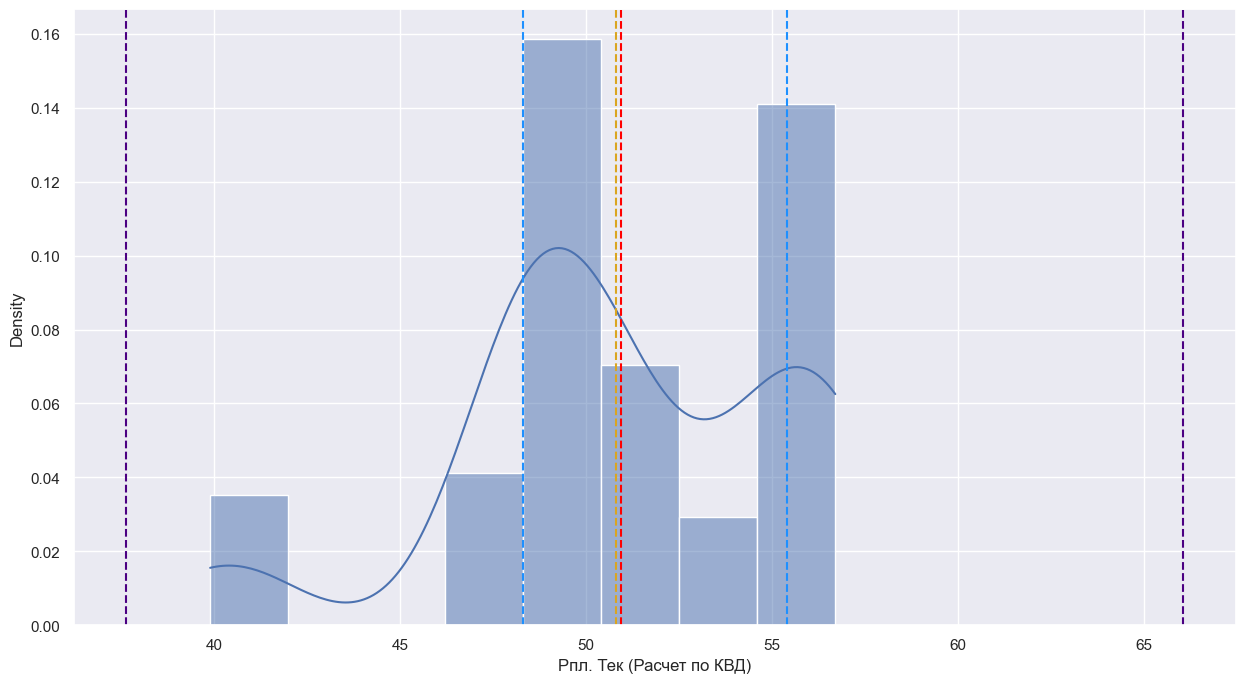

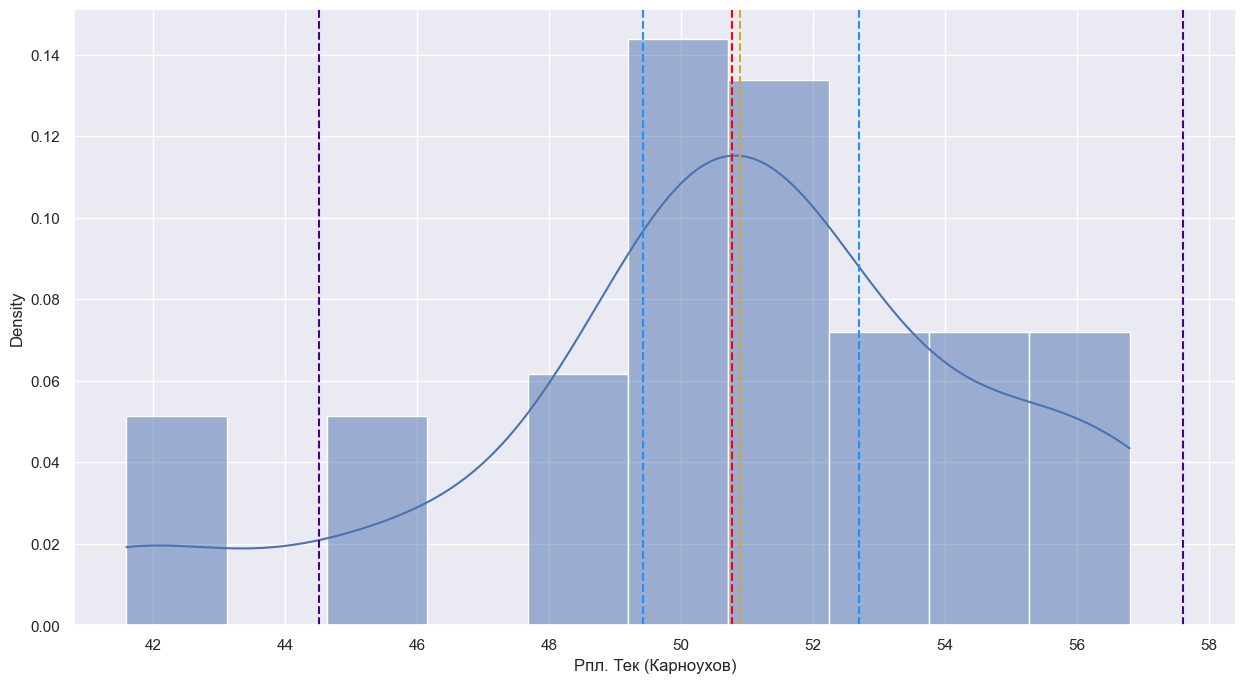

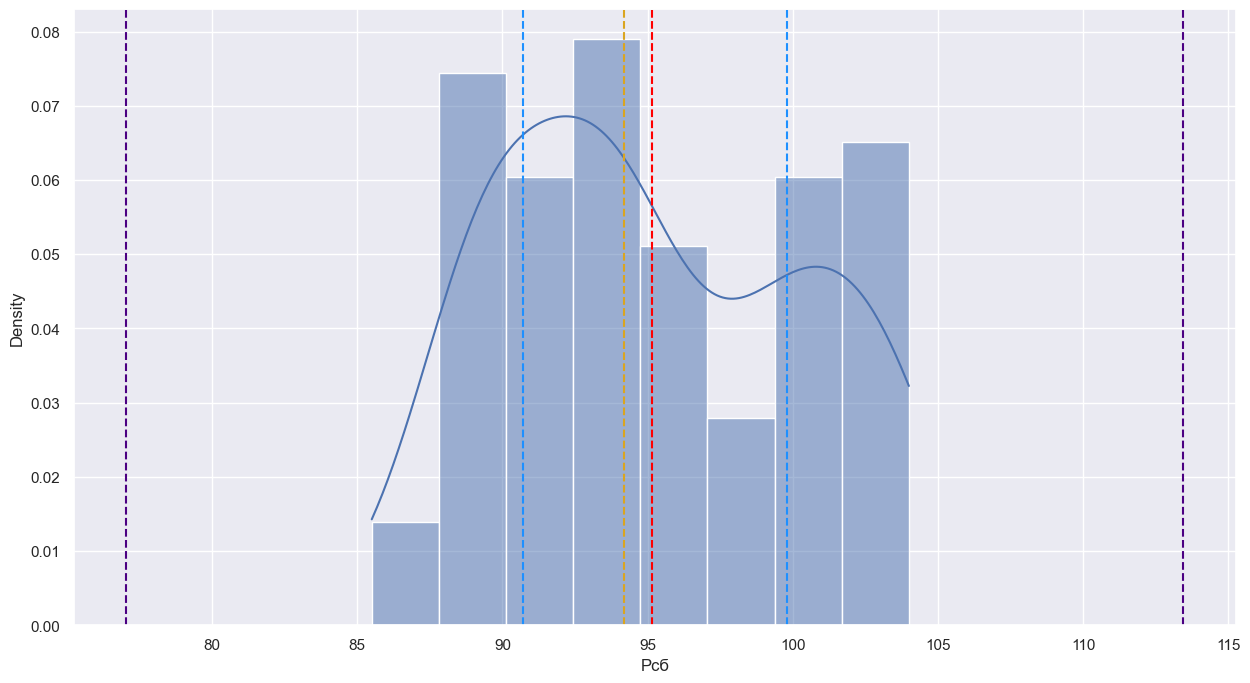

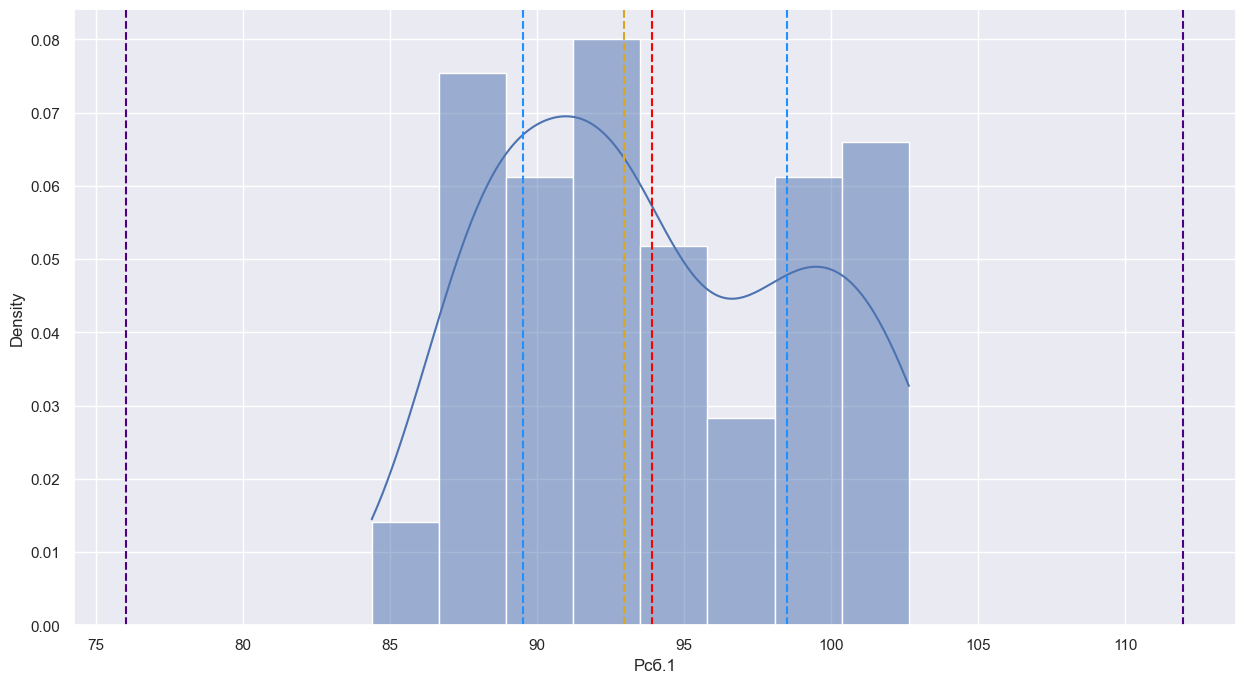

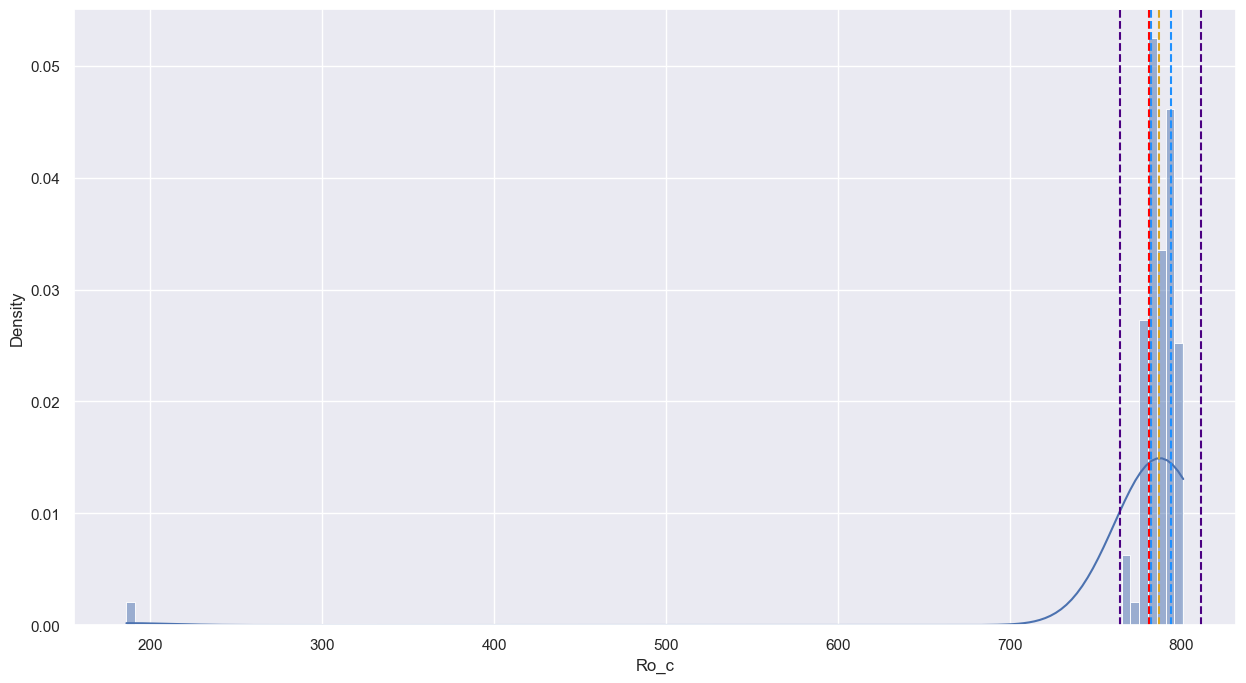

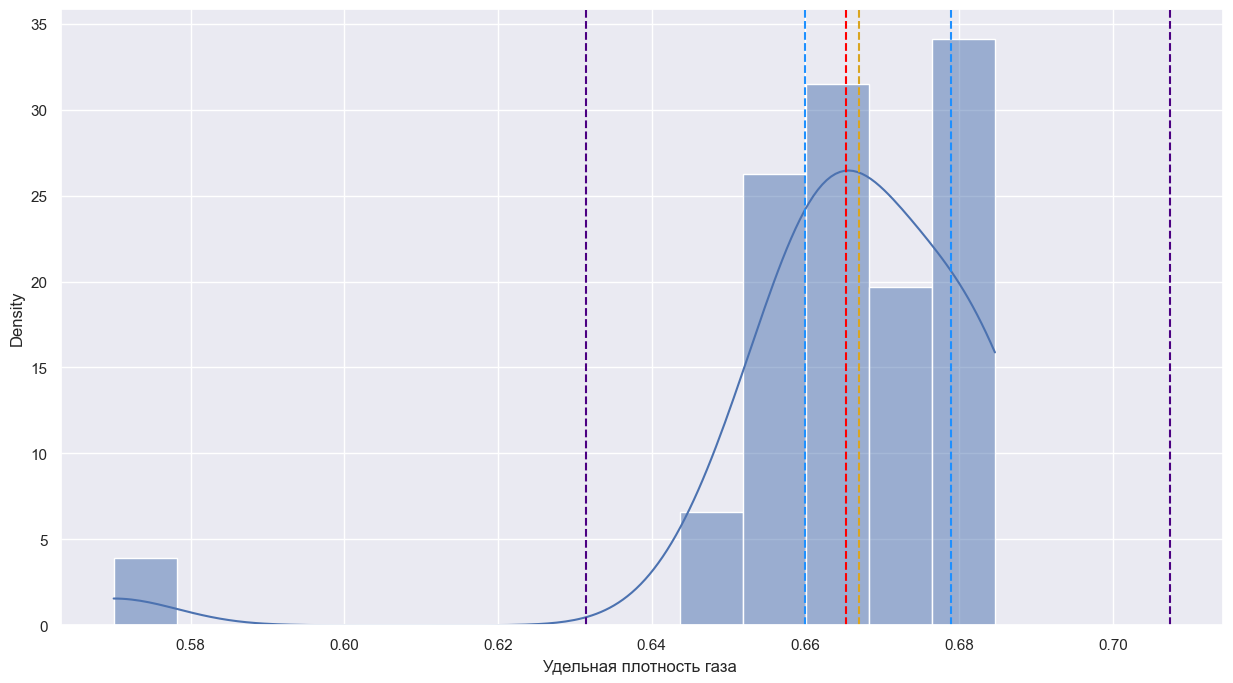

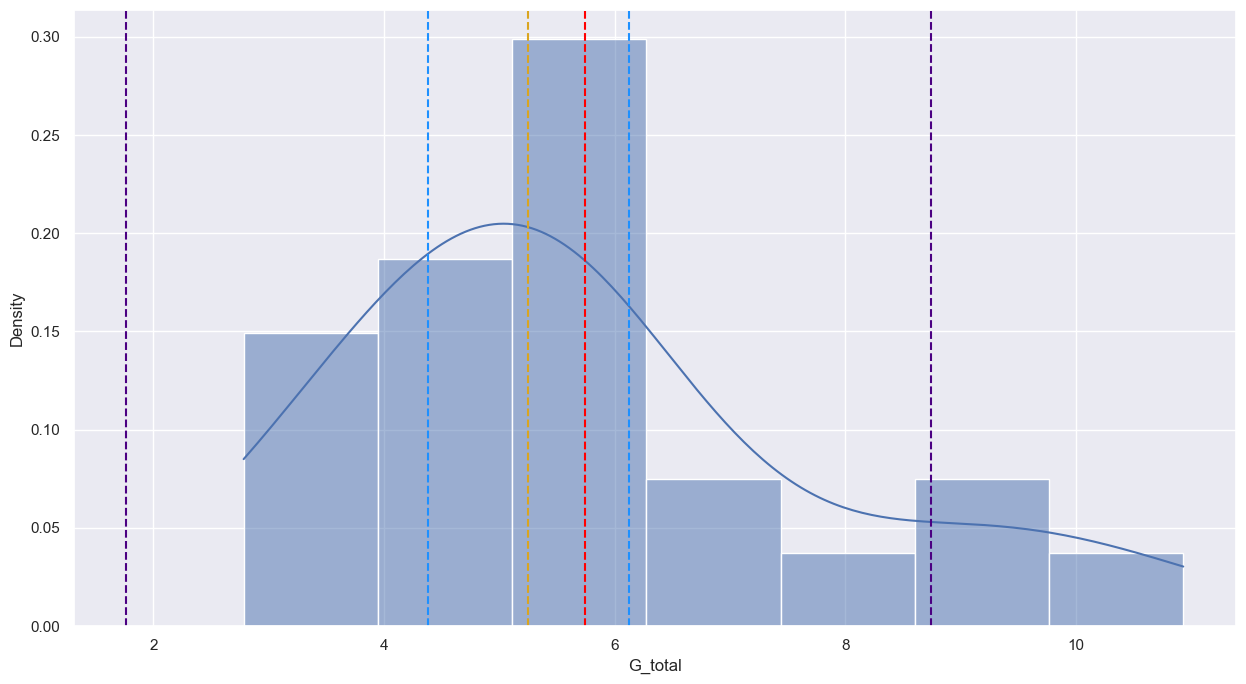

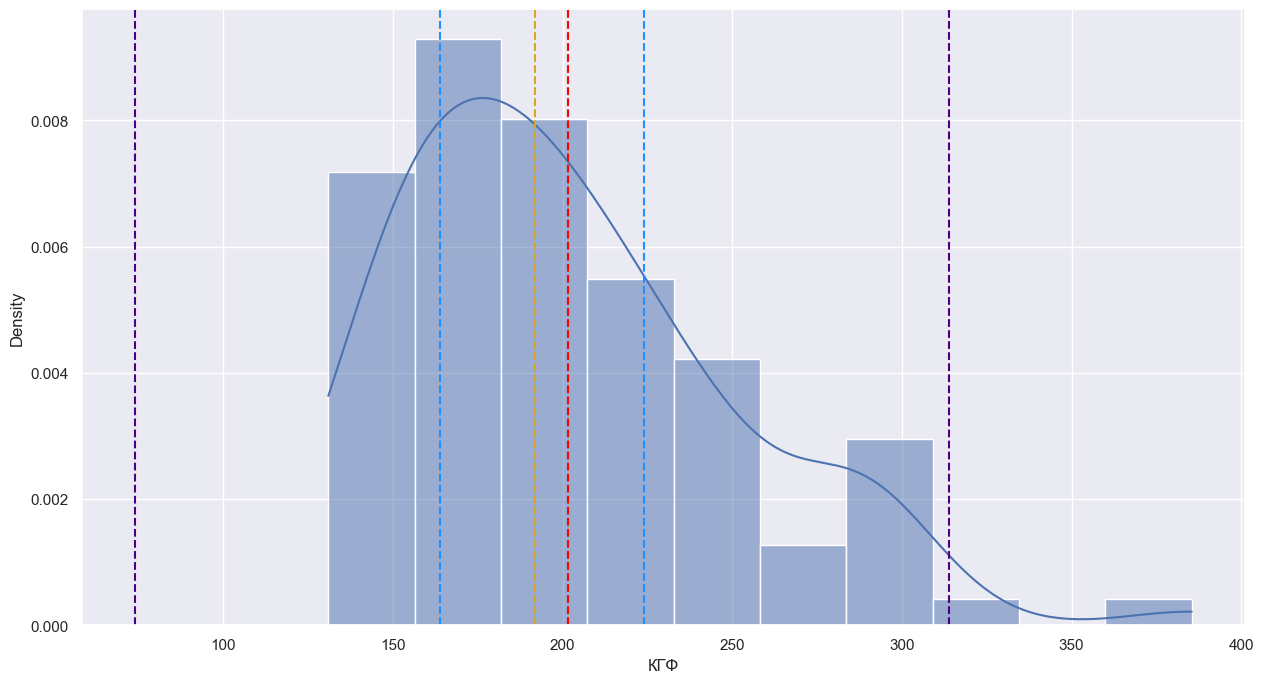

In [9]:
C=len(df.columns)
L=len(df.index)
#0
CN=df.count() #количество
#1
NP=((L-CN)/L)*100 #процент пропущенных значений
#2
MN=df.min() #минимум
#3
Q1=df.quantile(q=0.25) #первый квартиль
#4
MA=df.mean() #среднее значение
#5
ME=df.median() #медиана
#6
Q3=df.quantile(q=0.75) #третий квартиль
#7
MX=df.max() #максимум
#8
ST=df.std() #стандартное отклонение
#9
P=df.nunique() #мощность
#10
IQ=Q3-Q1 #интерквартильный размах

frame = pd.concat([CN, NP, MN, Q1, MA, ME, Q3, MX, ST, P, IQ], axis=1, join="inner")
frame=frame.T
f=pd.DataFrame(frame)
f.index=['Количество', 'Процент пропусков', 'Минимум', 'Первый квартиль','Среднее', 'Медиана', 'Третий квартиль', 'Максимум','Стандартное отклонение', 'Мощность', 'Интерквартильный размах']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
f1=f.style.apply(lambda x: ["background-color:tomato" if i==1 else "" for i in x], axis=1, subset=(["Мощность"], slice(None))).apply(lambda x: ["background-color:tomato" if i>=60 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:steelblue" if (i<30 and i>0) else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:limegreen" if i==0 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None)))

for i in df.columns:
    plt.figure(i)
    sns.histplot(df[i],kde=True,stat="density")
    plt.axvline(f.iloc[3][i]-(1.5*f.iloc[10][i]), color="indigo", ls='--') #q1-1.5*iqr
    plt.axvline(f.iloc[3][i], color="dodgerblue", ls='--') #первый квартиль
    plt.axvline(f.iloc[4][i], color="red", ls='--') #среднее
    plt.axvline(f.iloc[5][i], color="goldenrod", ls='--') #медиана
    plt.axvline(f.iloc[6][i], color="dodgerblue", ls='--') #третий квартиль
    plt.axvline(f.iloc[6][i]+1.5*f.iloc[10][i], color="indigo", ls='--') #q3+1.5*iqr
    plt.show()

находим gain_information, split_information, кореляцию, после чего соединяем в отдельную таблицу

In [10]:
def entropy(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = np.sum(probabilities * -np.log2(probabilities))
    return entropy

def information_gain(data, feature_name, target_name):
    # Вычисляем энтропию целевой переменной
    total_entropy = entropy(data[target_name].dropna())

    # Вычисляем энтропию после разбиения
    feature_values = data[feature_name].dropna().unique()
    weighted_entropies = []
    for value in feature_values:
        subset = data[data[feature_name] == value].dropna(subset=[target_name])
        weight = len(subset) / len(data.dropna(subset=[feature_name]))
        weighted_entropies.append(weight * entropy(subset[target_name]))
    new_entropy = np.sum(weighted_entropies)

    # Вычисляем информационный выигрыш
    information_gain = total_entropy - new_entropy

    return information_gain

def split_information(df, feature):
    # удаляем строки с пропущенными значениями в признаке
    df = df.dropna(subset=[feature])
    
    # вычисляем общее количество объектов
    total_count = len(df)
    
    # вычисляем количество объектов в каждом значении признака
    value_counts = df[feature].value_counts(dropna=False)
    
    # вычисляем split information
    split_info = 0
    for value, count in value_counts.items():
        p = count / total_count
        split_info += -p * np.log2(p)
    
    return split_info

df_copy = df.copy()
df_gain_cor = pd.DataFrame()

for i in df.columns:
    if(i != 'КГФ' and i != 'G_total'):
     gaint_ratio_KGF = information_gain(df_copy, i, 'КГФ') / split_information(df_copy, i)
     gaint_ratio_G_totak = information_gain(df_copy, i, 'G_total') / split_information(df_copy, i)
     corr_KGF = df_copy.corr().loc[i,'КГФ']
     corr_G_total = df_copy.corr().loc[i,'G_total']
     
     df_gain_cor[i] = [gaint_ratio_KGF, gaint_ratio_G_totak, abs(corr_KGF), abs(corr_G_total)]

df_gain_cor = df_gain_cor.set_index(pd.Index(['Gain_KGF', 'Gain_G_total', 'Cor_KGF', 'Cor_G_total']))
print(df_gain_cor)

              Глубина манометра       Dшт      Руст      Рзаб      Pлин  \
Gain_KGF               0.905318  0.866279  0.924831  0.932697  0.925920   
Gain_G_total           0.927627  1.446918  0.706585  0.701609  0.696345   
Cor_KGF                0.243306  0.231636  0.494718  0.548383  0.141389   
Cor_G_total            0.419692  0.735355  0.115329  0.282975  0.276614   

                Руст.1    Рзаб.1      Рлин      Туст  Тна шлейфе      Тзаб  \
Gain_KGF      0.923960  0.932928  0.925082  0.910870    1.026009  0.926920   
Gain_G_total  0.744648  0.699199  0.704219  0.821884    0.778999  0.754353   
Cor_KGF       0.481088  0.525020  0.167872  0.170377    0.219367  0.042117   
Cor_G_total   0.125809  0.311310  0.312419  0.689091    0.690502  0.440403   

                  Tлин  Дебит газа  Дебит ст. конд.  Дебит воды  Дебит смеси  \
Gain_KGF      0.925426    0.926407         0.926164    0.921466     0.935481   
Gain_G_total  0.700986    0.691765         0.694048    0.738214     0.698

отсекаем все столбцы у которых гейн меньше среднего

In [11]:
mean = 0.5

df_gain = df_gain_cor.drop(df_gain_cor.columns[(df_gain_cor.iloc[2] < mean) & (df_gain_cor.iloc[3] < mean)], axis=1)

print(df_gain)

df_out= pd.DataFrame()

for i in df_gain.columns:
    df_out[i] = df[i]

df_out['КГФ'] = df['КГФ']
df_out['G_total'] = df['G_total']
df_out.to_excel('out.xlsx', index=False)

                   Dшт      Рзаб    Рзаб.1      Туст  Тна шлейфе      Tлин  \
Gain_KGF      0.866279  0.932697  0.932928  0.910870    1.026009  0.925426   
Gain_G_total  1.446918  0.701609  0.699199  0.821884    0.778999  0.700986   
Cor_KGF       0.231636  0.548383  0.525020  0.170377    0.219367  0.270998   
Cor_G_total   0.735355  0.282975  0.311310  0.689091    0.690502  0.698988   

              Дебит газа  Дебит ст. конд.  Дебит воды  Дебит смеси  \
Gain_KGF        0.926407         0.926164    0.921466     0.935481   
Gain_G_total    0.691765         0.694048    0.738214     0.698540   
Cor_KGF         0.044515         0.458866    0.150919     0.006502   
Cor_G_total     0.993426         0.966527    0.842481     0.996004   

              Дебит гааз  Дебит кон нестабильный  Дебит воды.1  \
Gain_KGF        0.926164                0.925674      0.910720   
Gain_G_total    0.694048                0.698658      0.851849   
Cor_KGF         0.086603                0.475444      0.1259